In [2]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(1)
import matplotlib.pyplot as plt
import seaborn as sns
from t2e_utils import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
palette=sns.color_palette("RdBu_r", 50)
import pickle
import random
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import wtte.wtte as wtte
from keras.models import Sequential, load_model,Model
from keras.initializers import glorot_normal
from keras.layers import Dense,LSTM,GRU,Activation,Masking,BatchNormalization,Lambda,Input
from keras import backend as K
from keras import callbacks
from keras.optimizers import RMSprop,adam,Nadam
from keras.callbacks import History, EarlyStopping, ModelCheckpoint, CSVLogger, ReduceLROnPlateau
import os
plt.style.use('seaborn-muted')

%matplotlib inline
%load_ext autoreload
%autoreload 2
import h5py

path = '../Tax_paper/data/'
b = os.path.join(path,'bpi_12_w.csv')
b = pd.read_csv(b)

df_dict = {
    'a': None,
    'b': b,
    'c': None,
    'd':None
}
range_dict = {
    'a': range(2,8,1),
    'b': range(2,22,2),
    'c': range(2,12,2),
    'd': range(2,22,2)
}

Using TensorFlow backend.


In [1]:
# dataset_preprocessed_cen = preprocess(b, censored = True,  min_length = 0, cen_prc = 0.4)
# unique_cases = dataset_preprocessed_cen.loc[dataset_preprocessed_cen["U"] == 1, "CaseID"].unique()
# b_censored = b.loc[b["CaseID"].isin(unique_cases)]
# b_censored.to_csv("C:/Users/ebasfad/Dropbox/Data Science/01 - Masters/10 - Thesis/Tax_paper/data/bpi_12_w_censored.csv", index=False)

In [18]:
path = '../Tax_paper/code/output_files/results/'
# a = os.path.join(path,'suffix_and_remaining_time_helpdesk.csv')
# b = os.path.join(path,'suffix_and_remaining_time_bpi_12_w.csv')
# c = os.path.join(path,'suffix_and_remaining_time_bpi_12_w_no_repeat.csv')
# d = os.path.join(path,'suffix_and_remaining_time_env_permit.csv')

b_observed    = os.path.join(path,'suffix_and_remaining_time_bpi_12_w_observed.csv')
b_censored_40 = os.path.join(path,'suffix_and_remaining_time_bpi_12_w_censored.csv')


# a = pd.read_csv(a)
# b = pd.read_csv(b)
# c = pd.read_csv(c)
# d = pd.read_csv(d)

b_observed    = pd.read_csv(b_observed)
b_censored_40 = pd.read_csv(b_censored_40)


df_dict = {
#     'a': a,
#     'b': b,
#     'c': c,
#     'd': d,
    'b_observed': b_observed,
    'b_censored_40': b_censored_40
}

for dataset in ['b_observed','b_censored_40']:
    tmp = df_dict[dataset].groupby(["Prefix length"]).apply(lambda x:mean_absolute_error(x['Ground truth times'], x['Predicted times'])/86400).to_dict()
    tmp = {k:v for k,v in tmp.items() if k in list(range_dict['b'])}
    pickle.dump(list(tmp.values()), open('output_files/maes/'+ dataset +'.pkl', "wb"))

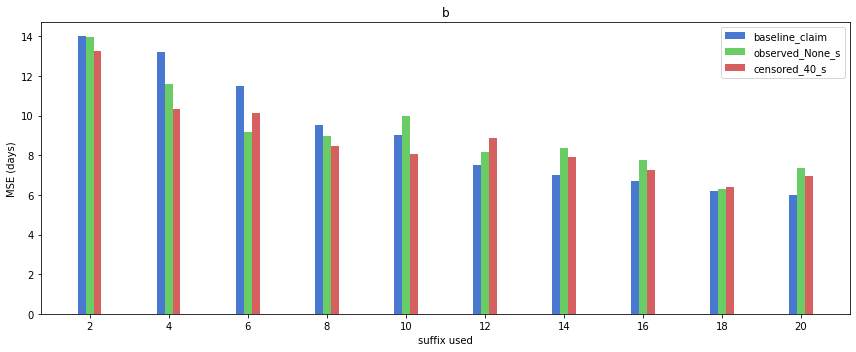

In [16]:
maes_path = "output_files/maes/"
cases = ["baseline_claim", "observed_None_s", "censored_40_s"]

fig, ax = plt.subplots(1, 1, figsize=(12,5))

for i,dataset in enumerate(['b']):

    X = np.array(range_dict[dataset])
    steps = [ -0.2,0, 0.2]
    for j,case in enumerate(cases):
        data = pickle.load(open(maes_path + case + ".pkl","rb"));
        plt.bar(X+steps[j], data, width = 0.2, label=case);
    
    plt.xticks(range_dict[dataset])
    plt.legend();
    plt.xlabel("suffix used")
    plt.ylabel("MSE (days)")
    plt.title(dataset)
plt.tight_layout()
plt.show()

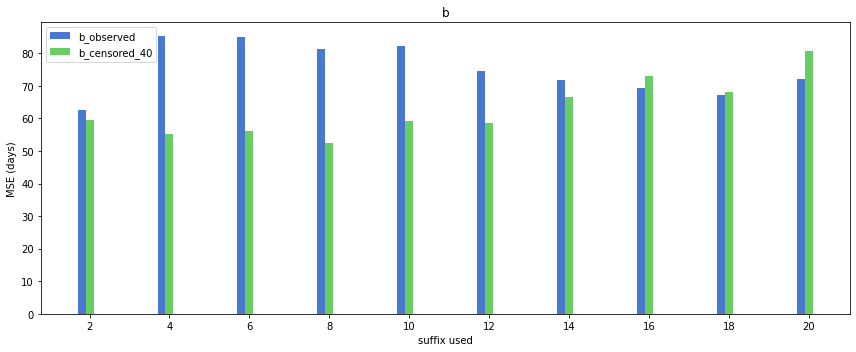

In [23]:
maes_path = "output_files/maes/"
cases = ["b_observed", "b_censored_40"]

fig, ax = plt.subplots(1, 1, figsize=(12,5))

for i,dataset in enumerate(['b']):

    X = np.array(range_dict[dataset])
    steps = [-0.2, 0, 0.2]
    for j,case in enumerate(cases):
        data = pickle.load(open(maes_path + case + ".pkl","rb"));
        plt.bar(X+steps[j], data, width = 0.2, label=case);
    
    plt.xticks(range_dict[dataset])
    plt.legend();
    plt.xlabel("suffix used")
    plt.ylabel("MSE (days)")
    plt.title(dataset)
plt.tight_layout()
plt.show()

In [ ]:
dataset = "b"

for i, suffix in enumerate(range_dict[dataset]):

    print("suffix = ", suffix)
    print(test_result_df["predicted_mode"].value_counts())
    history = pd.read_csv(path +'training_'+str(suffix)+'.log', sep=',', engine='python')
    test_result_df = pickle.load(open(path+"test_res_censored_50_s.pkl", "rb"))[i]
    plt.figure(figsize = (12,5));
    plt.plot(history['loss'], label='training');
    plt.plot(history['val_loss'],label='validation');
    plt.title('loss');
    plt.legend();
    plt.show();
    print("============================================================================")